In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
    def analyze_stock_data(tickers, start_date, end_date):
        # Download stock data from Yahoo Finance
        stock_data = {}
        for company, ticker in tickers.items():
            try:
                stock_data[company] = yf.download(ticker, start=start_date, end=end_date)
                stock_data[company].reset_index(inplace=True)  # Reset index
            except Exception as e:
                print(f"Error downloading data for {company}: {e}")
                continue

        # Calculate daily returns
        daily_returns = {}
        for company, data in stock_data.items():
            if not data.empty:
                data['Daily Return'] = data['Close'].pct_change()
                daily_returns[company] = data['Daily Return']

        # Calculate annualized mean daily return, volatility, and Sharpe ratio
        metrics = []
        trading_days = 252
        for company, returns in daily_returns.items():
            if not returns.empty:
                mean_return = returns.mean() * trading_days
                volatility = returns.std() * np.sqrt(trading_days)
                sharpe_ratio = mean_return / volatility
                metrics.append((company, mean_return, volatility, sharpe_ratio))

        # Convert metrics to DataFrame
        metrics_df = pd.DataFrame(metrics, columns=['Company', 'Annualized Mean Return', 'Annualized Volatility', 'Sharpe Ratio'])

        # Print the metrics
        print(metrics_df)

        # Calculate average annualized return and volatility
        average_annualized_return = metrics_df['Annualized Mean Return'].mean()
        average_annualized_volatility = metrics_df['Annualized Volatility'].mean()

        print(f"Average Annualized Return: {average_annualized_return}")
        print(f"Average Annualized Volatility: {average_annualized_volatility}")

        # Create a scatter plot
        plt.figure(figsize=(14, 8))
        scatter = plt.scatter(metrics_df['Annualized Volatility'], metrics_df['Annualized Mean Return'], c=metrics_df['Sharpe Ratio'], cmap='viridis', s=100, alpha=1, edgecolors='w')

        # Add color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Ratio de Sharp', fontsize=14, fontweight='bold')

        # Customize the title and labels
        plt.title('Rendimiento Annual Promedio vs. Volatilidad Histórica (Color: Ratio de Sharpe) [2018-2024]', fontsize=18, fontweight='bold', color='black')
        plt.xlabel('Volatilidad Histórica', fontsize=14, fontweight='bold')
        plt.ylabel('Rendimiento Anual Promedio', fontsize=14, fontweight='bold')

        # Add labels for each point
        for i, row in metrics_df.iterrows():
            plt.text(row['Annualized Volatility'], row['Annualized Mean Return'], row['Company'], fontsize=9, ha='right', fontweight='bold')

        # Show the plot
        plt.grid(True, linestyle='--', linewidth=0.7, axis='both')
        plt.tight_layout()
        plt.show()

        return metrics_df, average_annualized_return, average_annualized_volatility

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


         Company  Annualized Mean Return  Annualized Volatility  Sharpe Ratio
0           Nike                0.085048               0.326090      0.260811
1         Adidas                0.092028               0.359637      0.255891
2   Under Armour                0.028811               0.521456      0.055252
3           Puma                0.077622               0.374067      0.207508
4       Skechers                0.178252               0.435502      0.409302
5          Asics                0.350701               0.462761      0.757845
6      Lululemon                0.255966               0.396236      0.645995
7             On                0.303306               0.622350      0.487356
8        Deckers                0.450790               0.414836      1.086671
9           Anta                0.195985               0.439279      0.446150
10       Li Ning                0.271808               0.592592      0.458676
11          V.F.               -0.117235               0.430323 

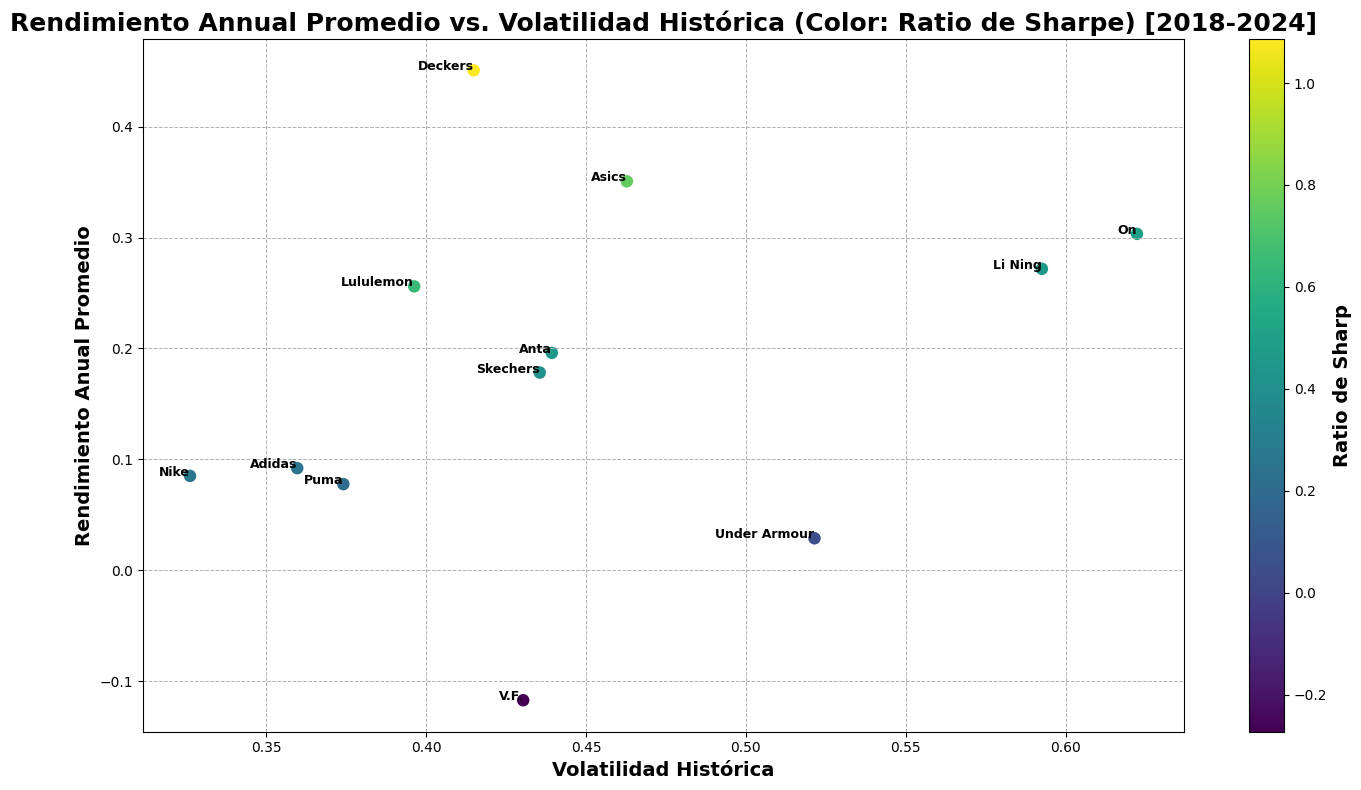

In [3]:
# Example usage
tickers = {
    'Nike': 'NKE',
    'Adidas': 'ADDYY',
    'Under Armour': 'UAA',
    'Puma': 'PUM.DE',
    'Skechers': 'SKX',
    'Asics': 'ASCCY',  # Placeholder, replace with correct ticker if available
    'Lululemon': 'LULU',
    'On': 'ONON',
    'Deckers': 'DECK',
    'Anta': 'ANPDY',  # Placeholder, replace with correct ticker if available
    'Li Ning': 'LNNGY',  # Placeholder, replace with correct ticker if available
    'V.F.': 'VFC'
}

start_date = "2023-09-13"
end_date = "2024-09-13"

metrics_df, avg_return, avg_volatility = analyze_stock_data(tickers, start_date, end_date)